1.Download the Employee Attrition Dataset
https://www.kaggle.com/datasets/patelprashant/employee-attrition
2.Perfrom Data Preprocessing
3.Model Building using Logistic Regression and Decision Tree and Random Forest
4.Calculate Performance metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/Users/tejastammewar/Desktop/aiml/datasets/Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of         Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                Fals

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [8]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
df['Attrition'].value_counts(normalize=True)*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

In [10]:
df.drop(columns=['Over18','StandardHours','EmployeeCount','EmployeeNumber'],axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [11]:
#statistics for categorical columns
df.describe(include='O').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


<AxesSubplot:>

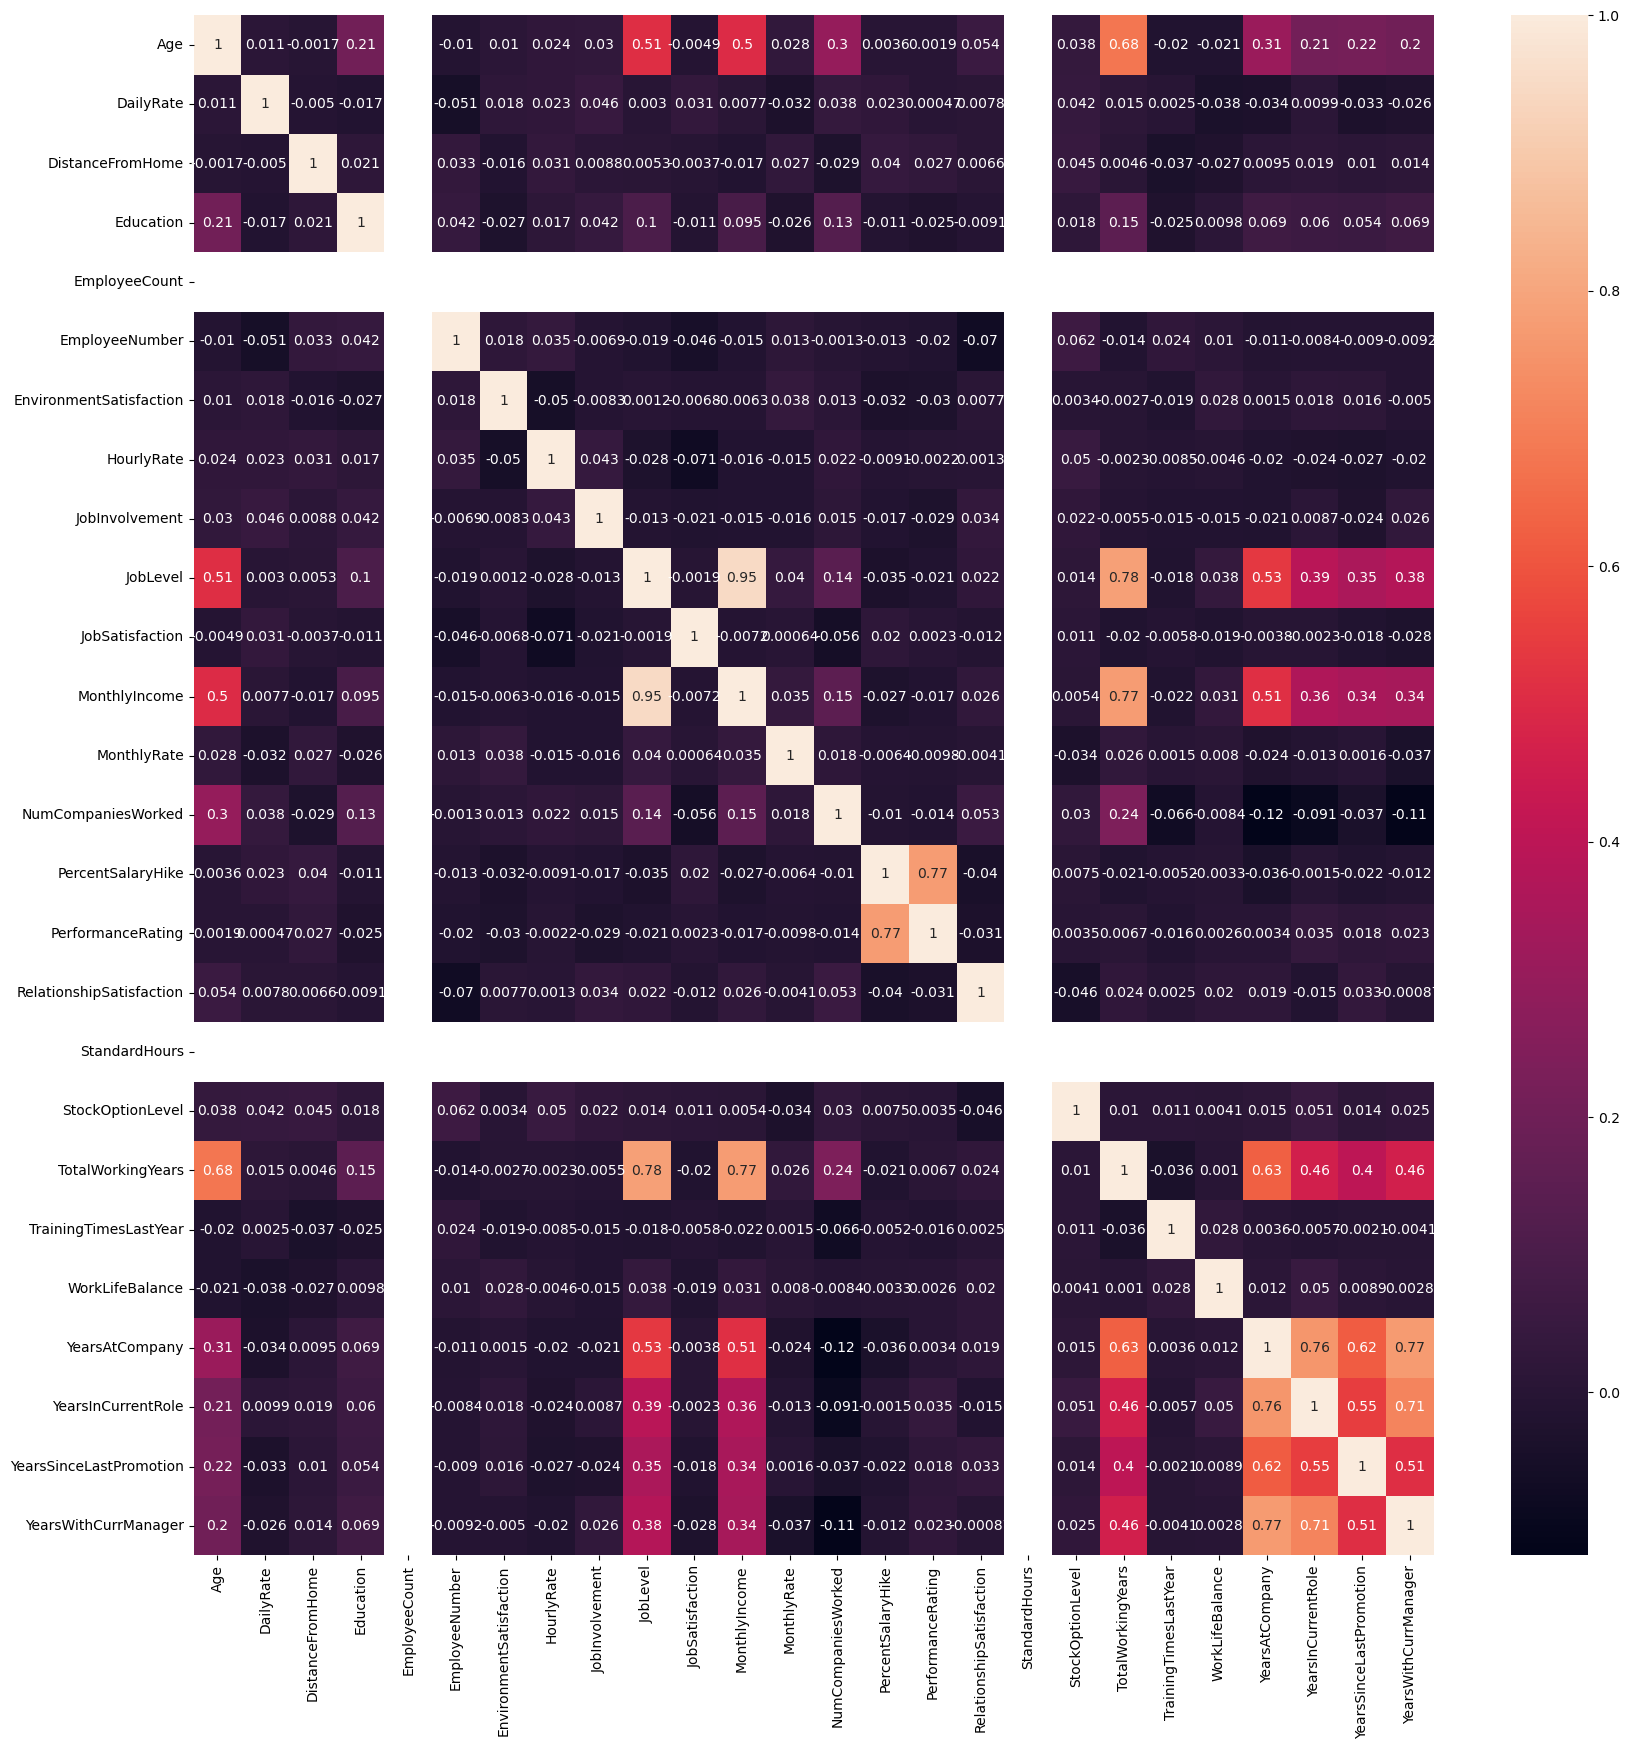

In [12]:
#data visualisation
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True)

(array([588.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 882.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

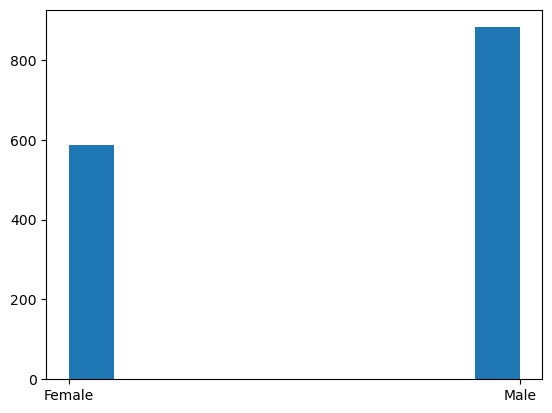

In [13]:
x=df['Gender']
plt.hist(x)

(array([1043.,    0.,    0.,    0.,    0.,  277.,    0.,    0.,    0.,
         150.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

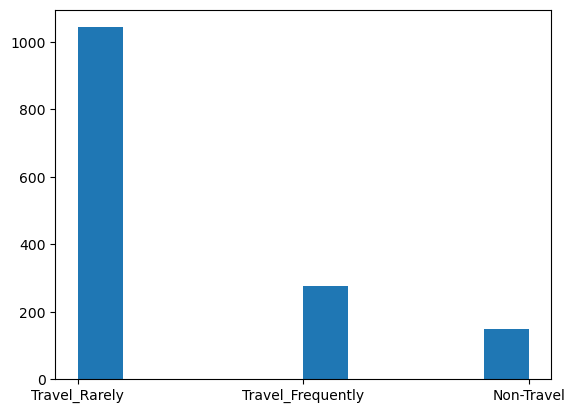

In [14]:
x=df['BusinessTravel']
plt.hist(x)

(array([ 237.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1233.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

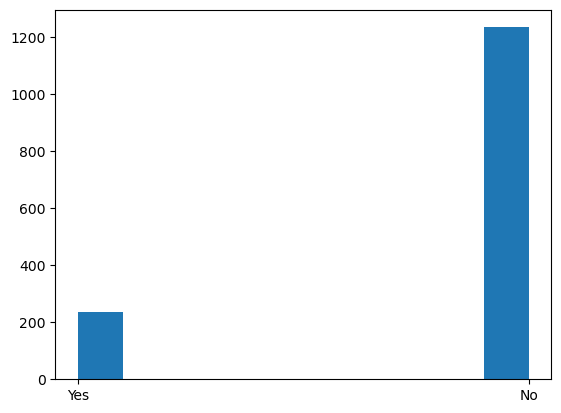

In [15]:
x=df['Attrition']
plt.hist(x)

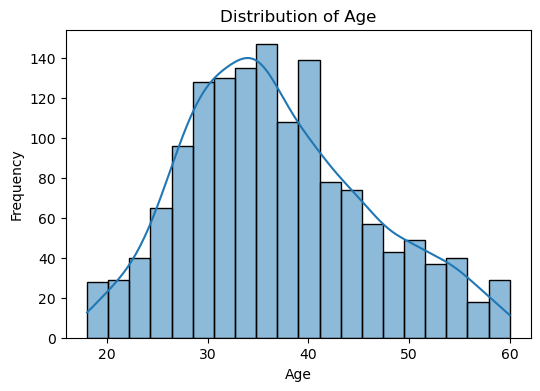

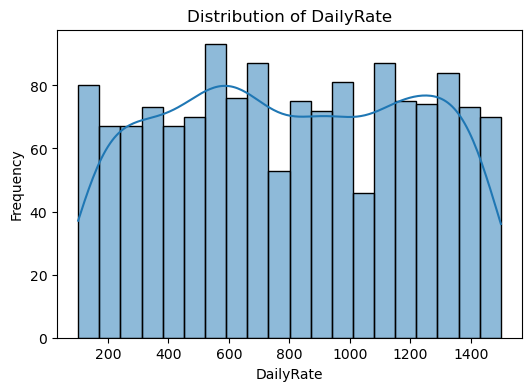

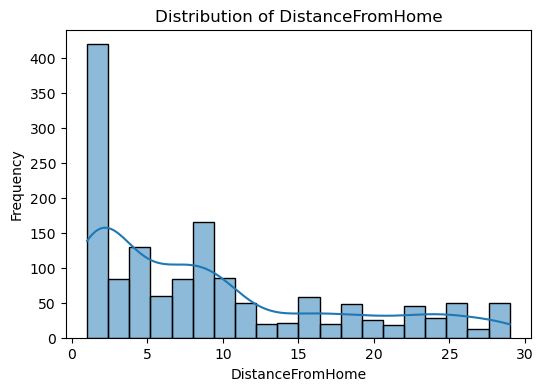

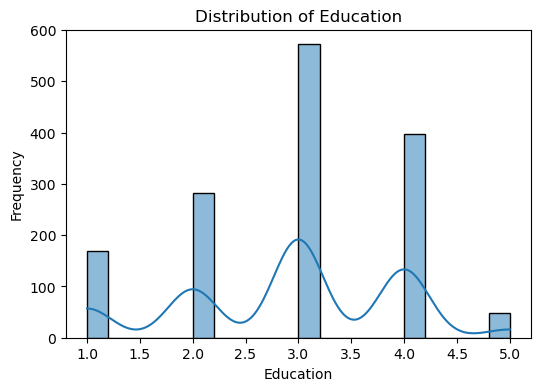

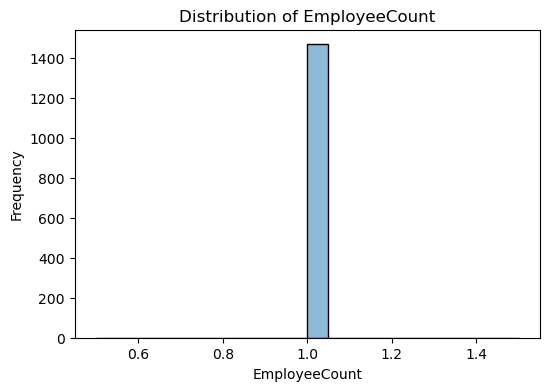

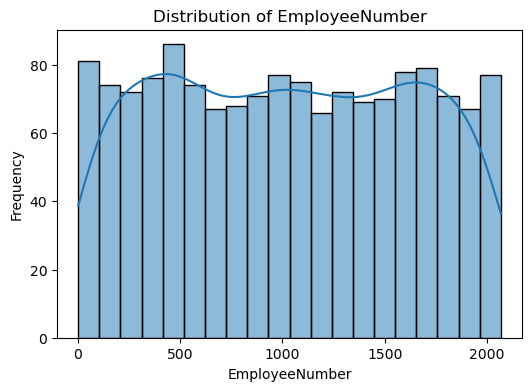

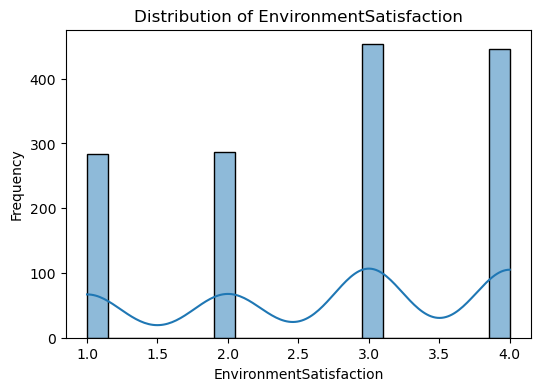

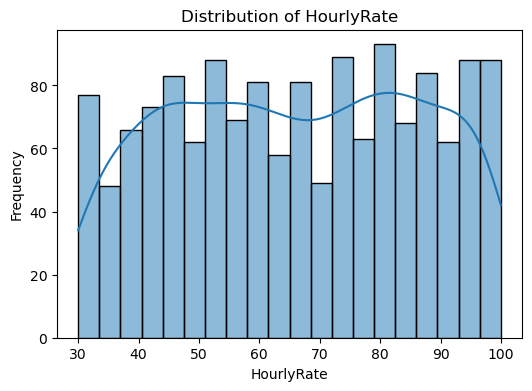

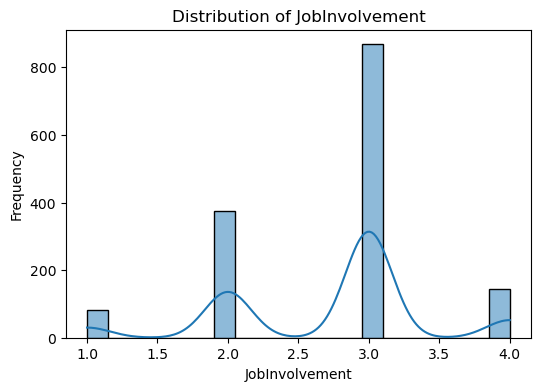

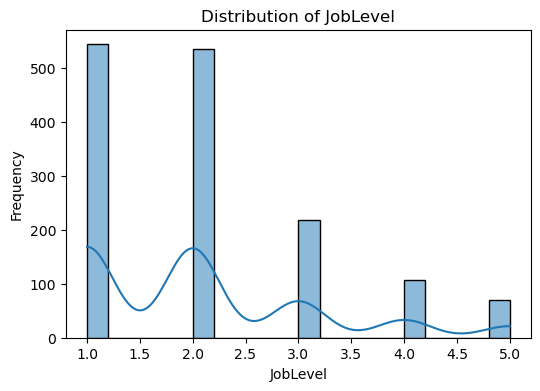

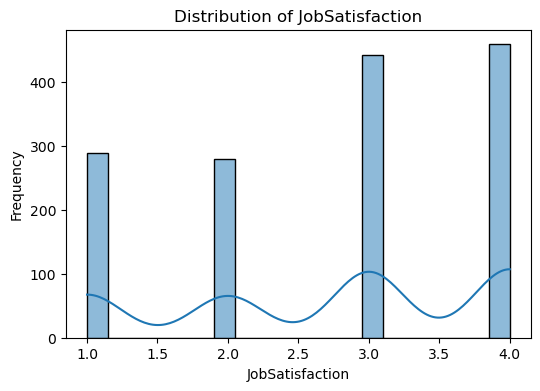

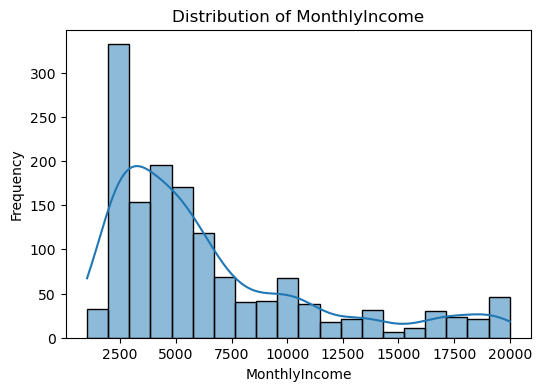

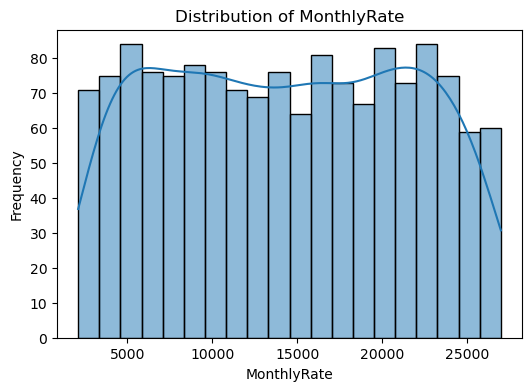

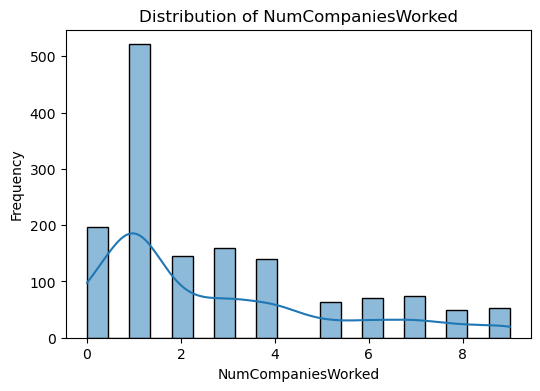

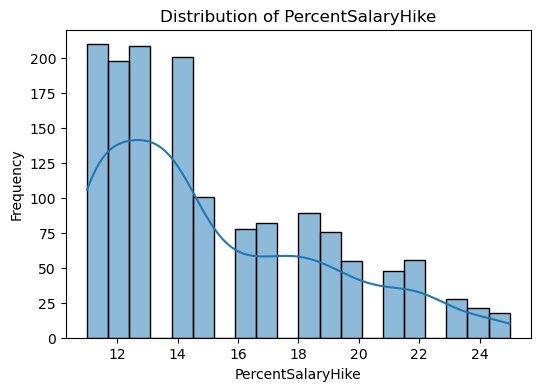

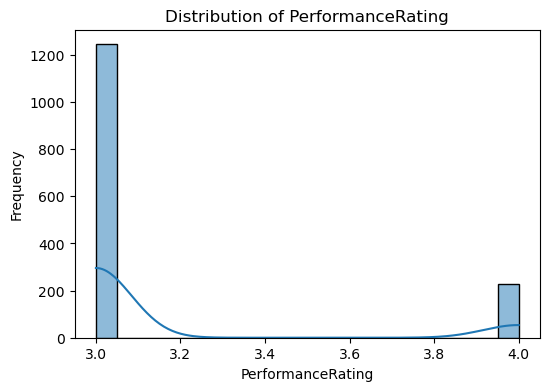

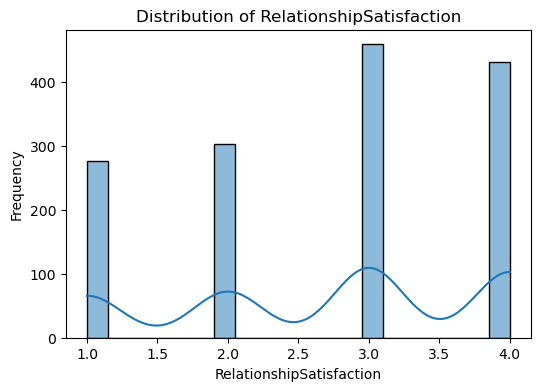

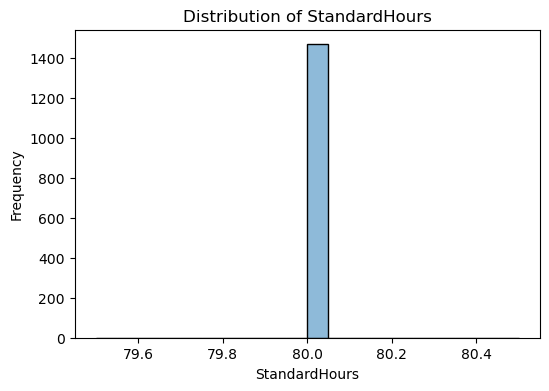

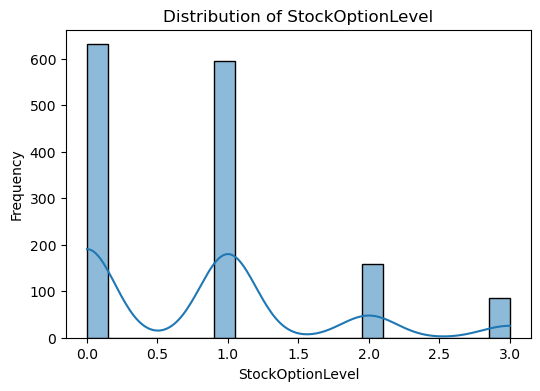

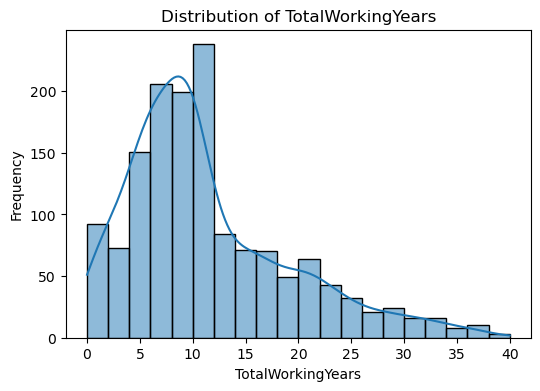

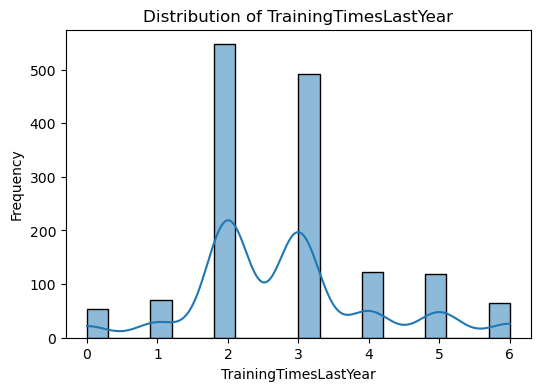

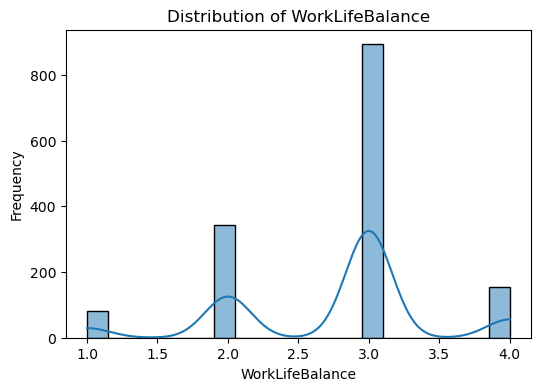

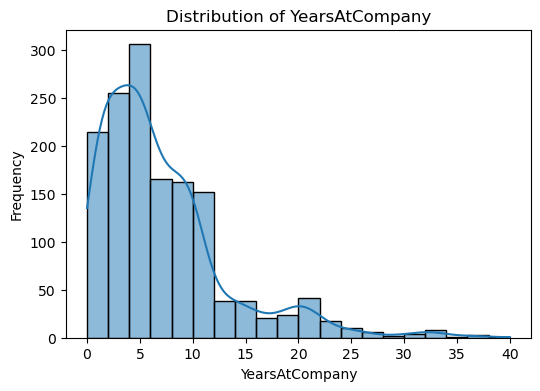

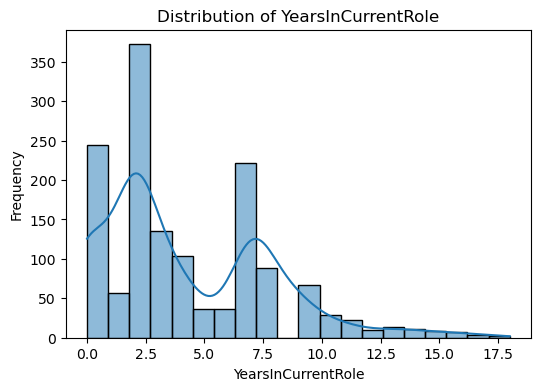

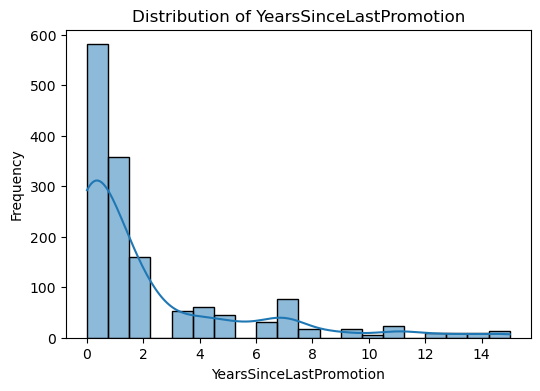

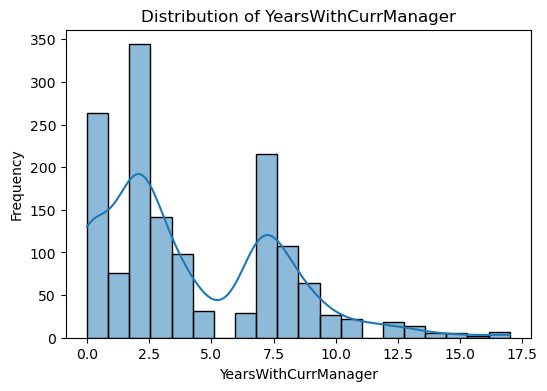

In [16]:
numerical_columns = df.select_dtypes(include=['int64']).columns
# Creating histogram plots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

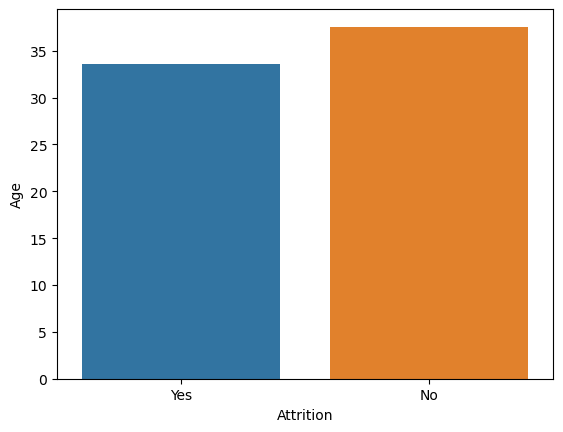

In [17]:
sns.barplot(x='Attrition',y='Age',data=df,ci=None)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

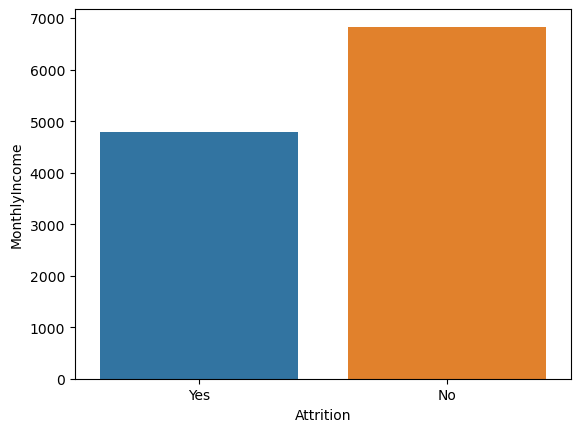

In [18]:
sns.barplot(x='Attrition',y='MonthlyIncome',data=df,ci=None)

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

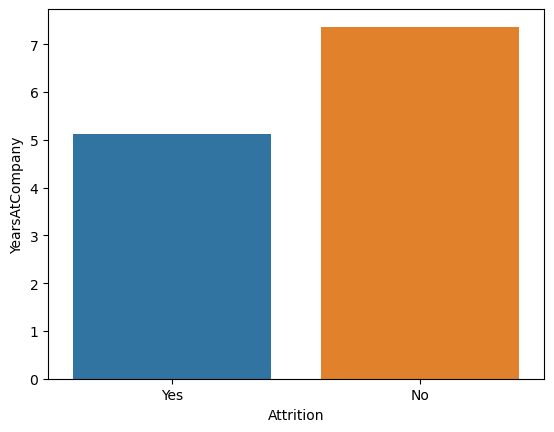

In [19]:
sns.barplot(x='Attrition',y='YearsAtCompany',data=df,ci=None)

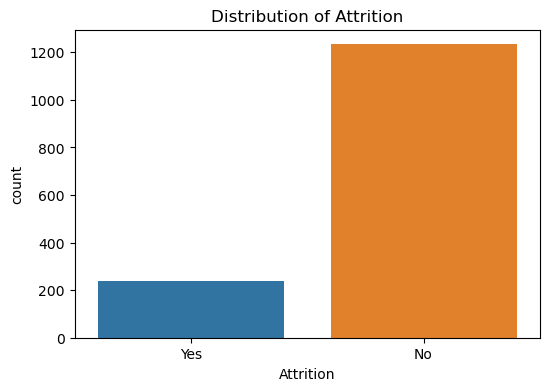

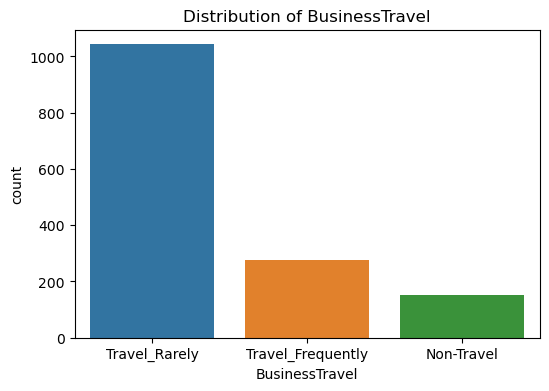

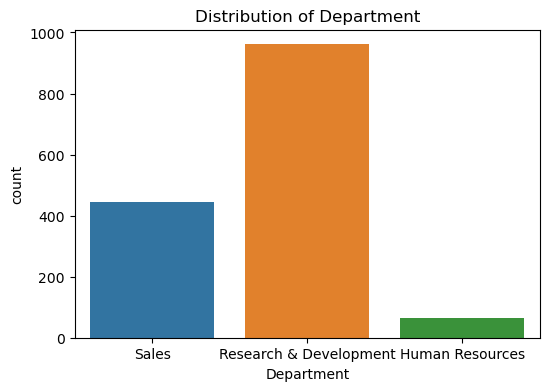

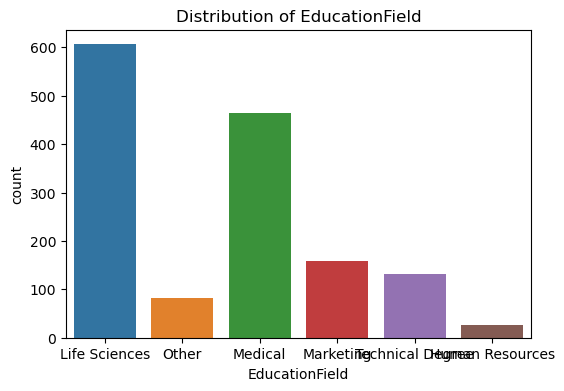

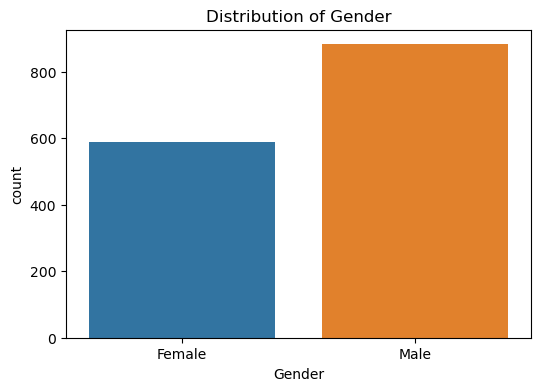

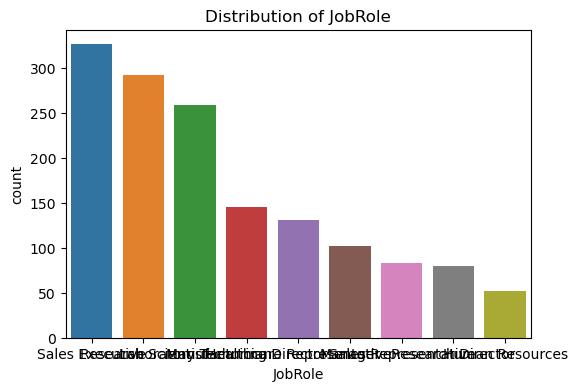

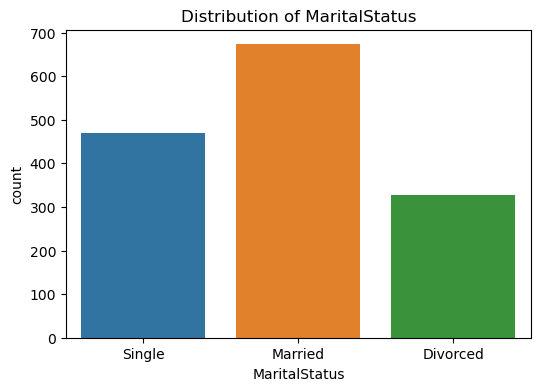

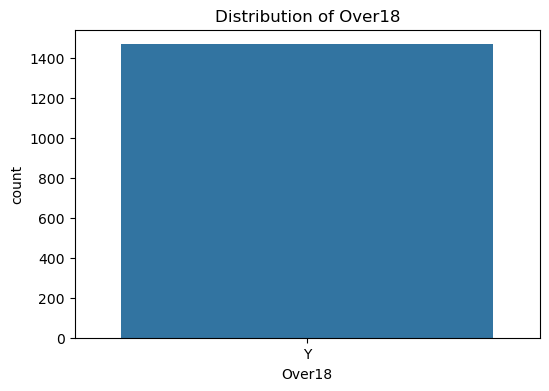

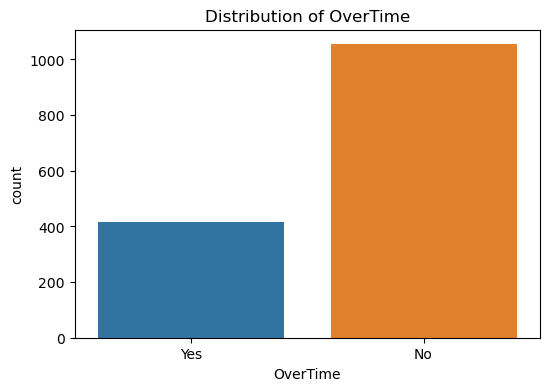

In [20]:
categorical_columns=df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  plt.figure(figsize=(6,4))
  sns.countplot(data=df, x=col)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()

In [21]:
# grouped_department = df.groupby("Attrition")["Department"].value_counts().reset_index(name="Count")
# grouped_department

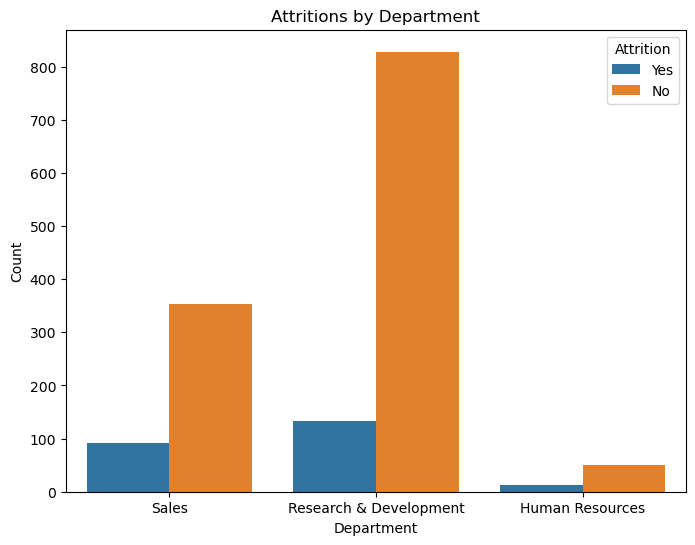

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Department", hue="Attrition")
plt.title("Attritions by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title="Attrition")
plt.show()

In [24]:
categorical_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

<AxesSubplot:xlabel='EducationField', ylabel='count'>

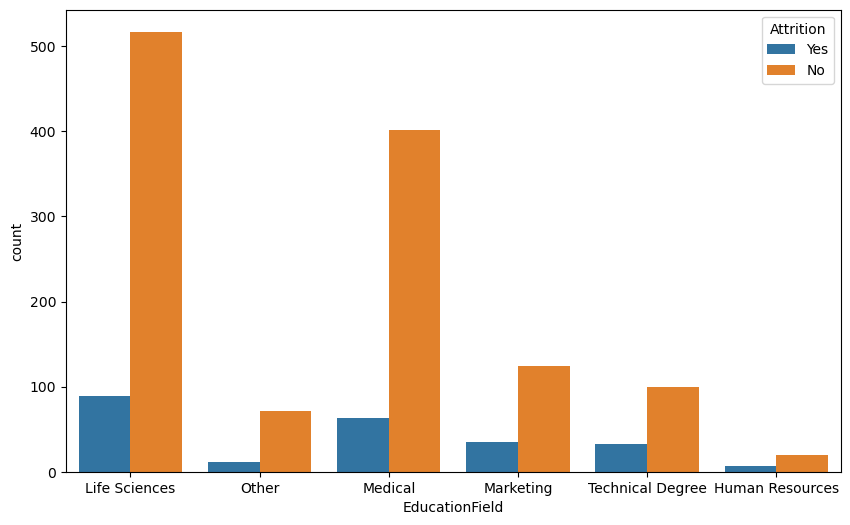

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="EducationField", hue="Attrition")

# Outlier detection

In [26]:
numerical_columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

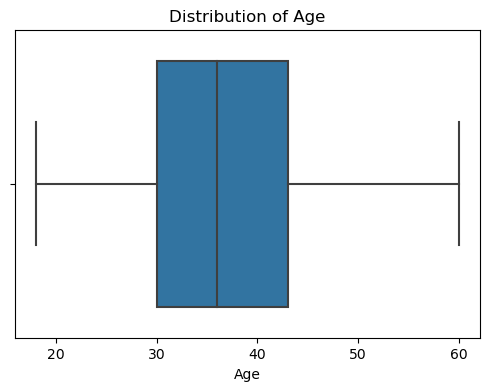

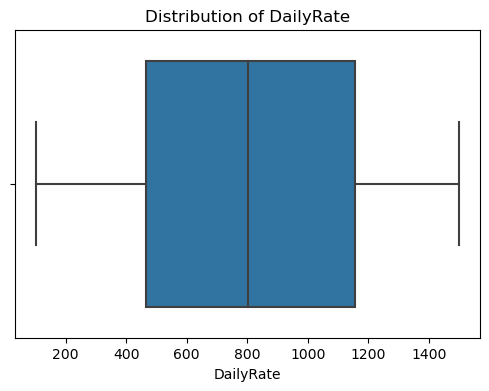

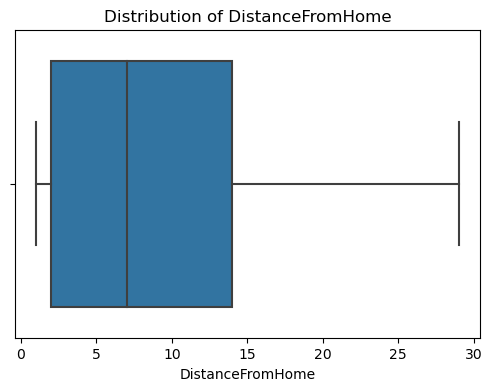

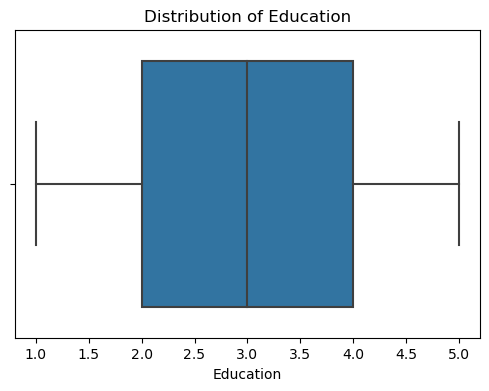

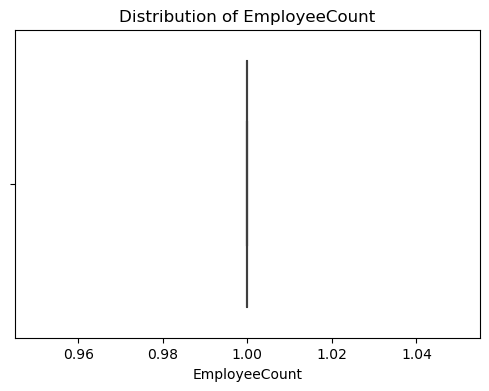

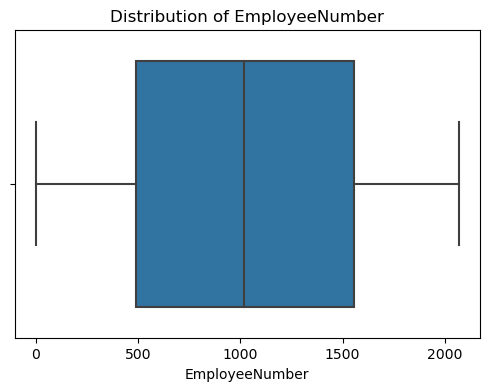

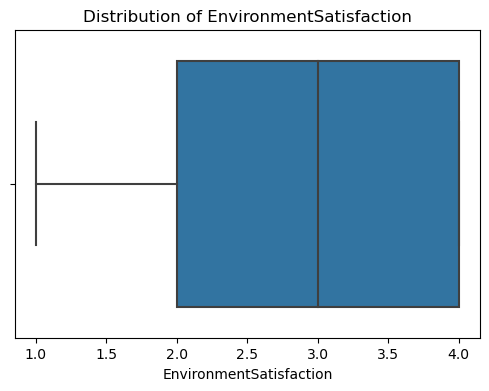

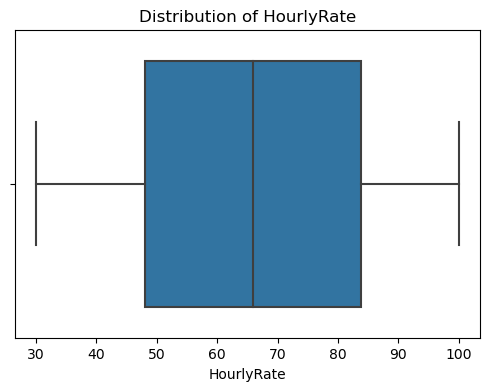

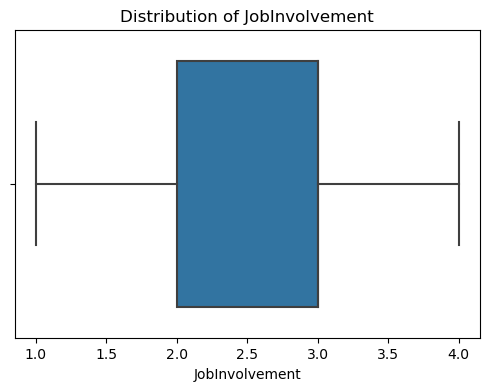

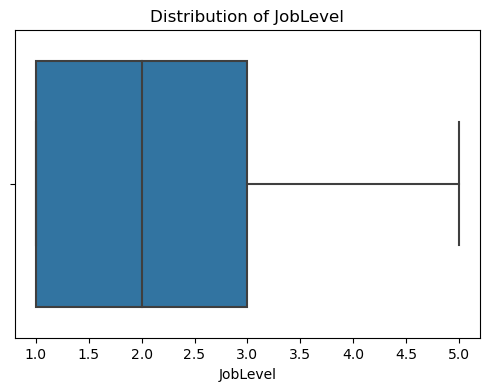

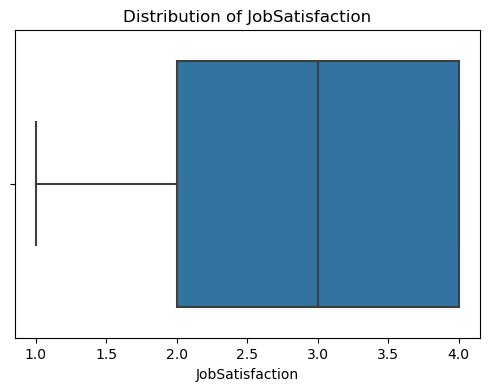

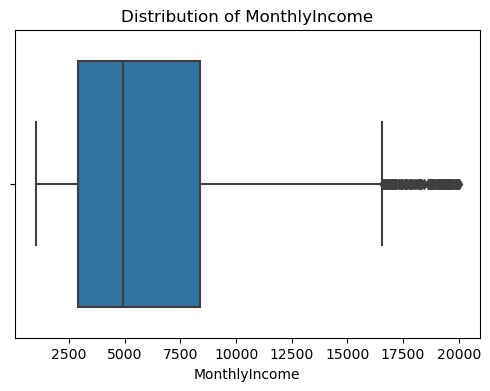

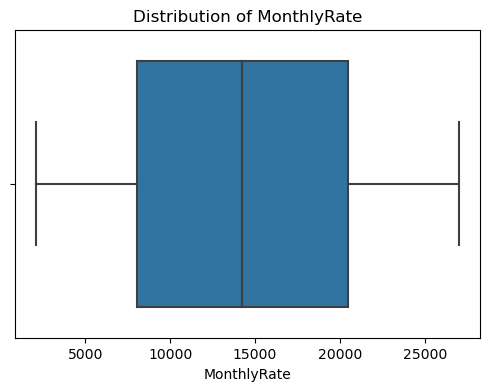

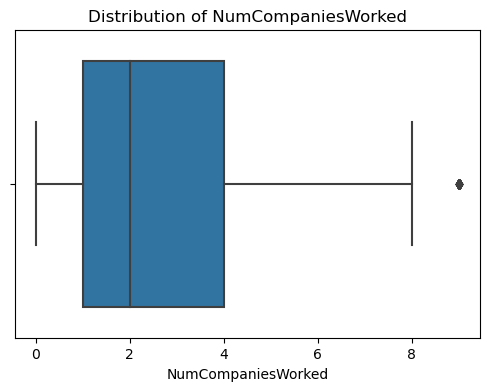

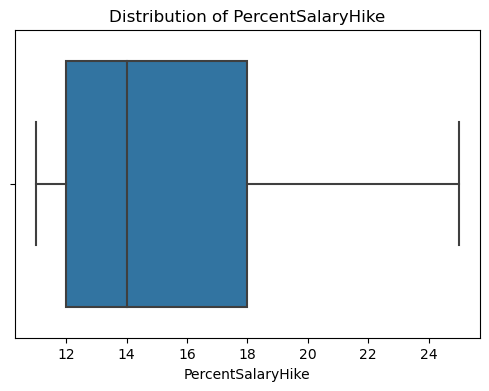

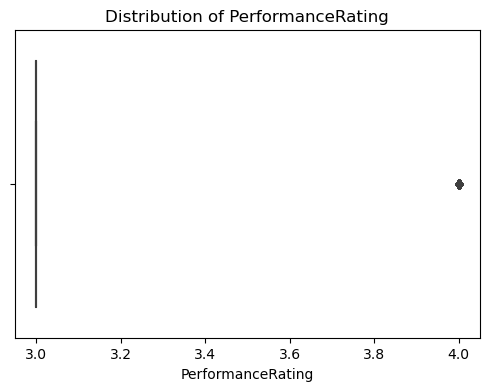

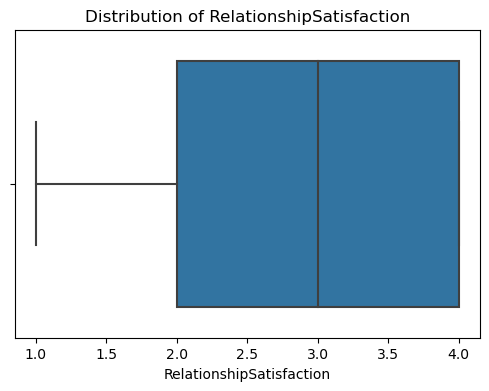

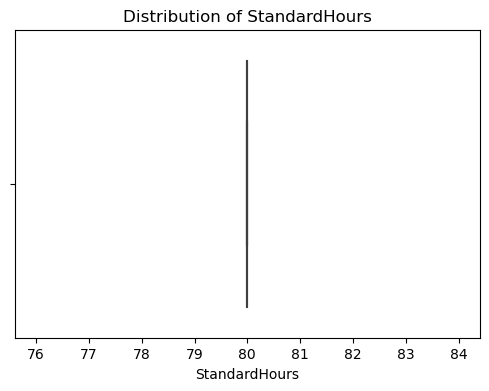

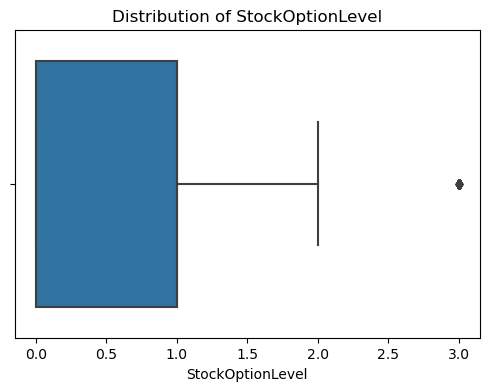

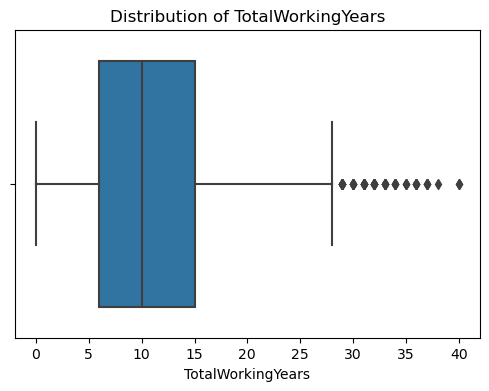

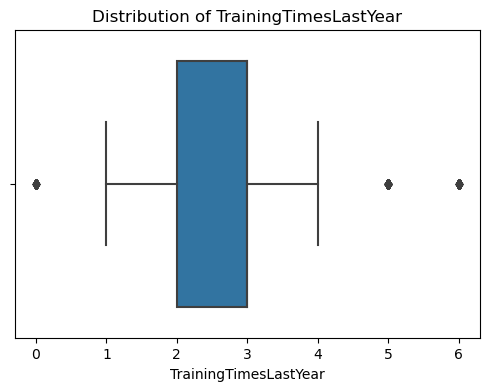

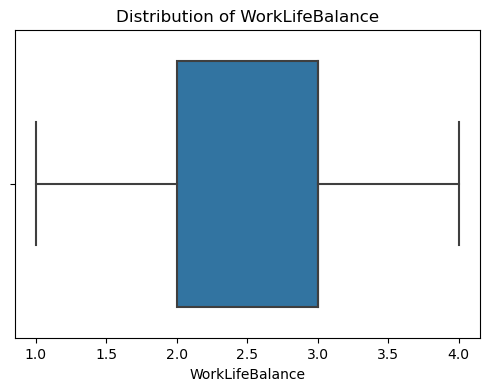

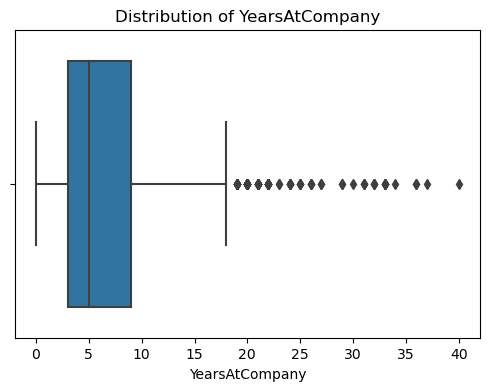

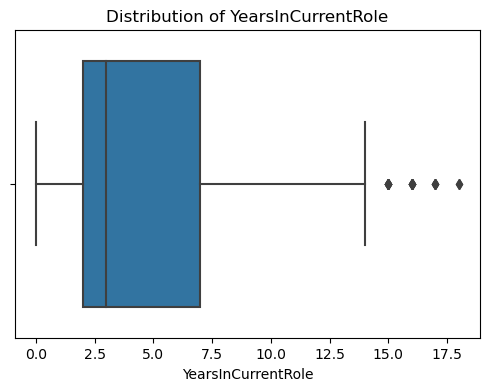

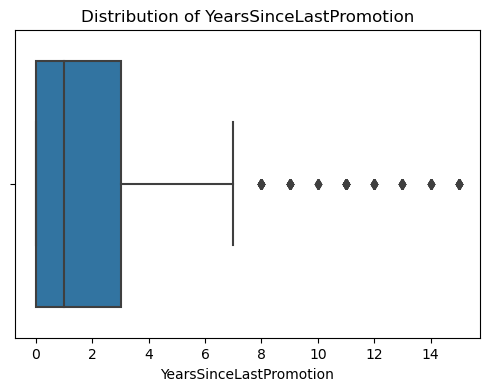

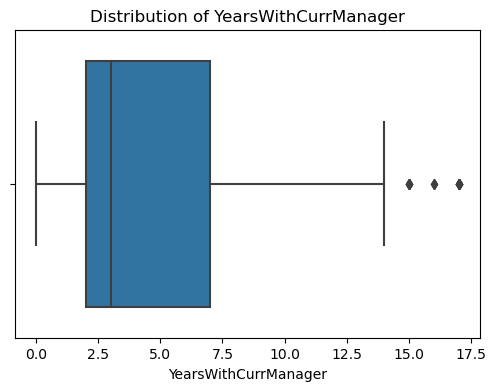

In [27]:
for col in numerical_columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=df, x=col)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.show()

# Outlier removal in MonthlyIncome

In [28]:
q1=df.MonthlyIncome.quantile(0.25)
q3=df.MonthlyIncome.quantile(0.75)
print(q1,q3)

2911.0 8379.0


In [29]:
IQR=q3-q1
IQR

5468.0

In [30]:
whisker_width = 1.5
lower_whisker = q1 -(whisker_width*IQR)
upper_whisker = q3 + (whisker_width*IQR)
df['MonthlyIncome']=np.where(df['MonthlyIncome']>upper_whisker,upper_whisker,
                    np.where(df['MonthlyIncome']<lower_whisker,lower_whisker,df['MonthlyIncome']))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

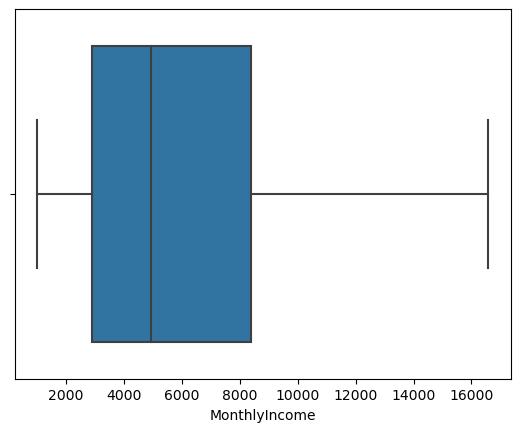

In [31]:
sns.boxplot(df.MonthlyIncome)

In [32]:
q1=df.TotalWorkingYears.quantile(0.25)
q3=df.TotalWorkingYears.quantile(0.75)
print(q1,q3)

6.0 15.0


In [33]:
IQR=q3-q1
IQR

9.0

In [34]:
whisker_width = 1.5
lower_whisker = q1 -(whisker_width*IQR)
upper_whisker = q3 + (whisker_width*IQR)
df['TotalWorkingYears']=np.where(df['TotalWorkingYears']>upper_whisker,upper_whisker,
                    np.where(df['TotalWorkingYears']<lower_whisker,lower_whisker,df['TotalWorkingYears']))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears'>

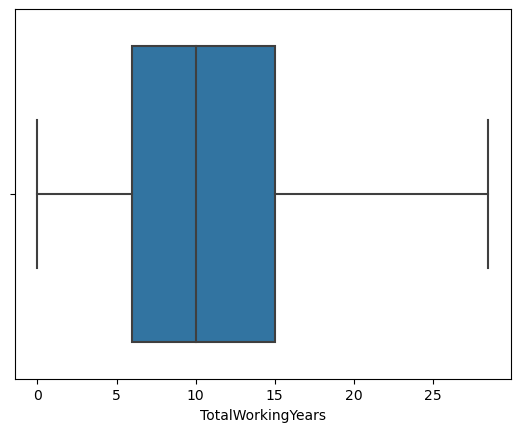

In [35]:
sns.boxplot(df.TotalWorkingYears)

In [36]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype ==np.number:
        continue
    df[col] = LabelEncoder().fit_transform(df[col])

/var/folders/r_/xpqpg2151rg15r2lh34224d00000gp/T/ipykernel_1240/2159073727.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype ==np.number:


In [37]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [38]:
df=df.drop('Age',axis=1)

In [39]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,624,2,0,1,1,0,0,1,...,0,0,0,8.0,0,0,6,4,0,5
1,0,1,113,1,7,0,1,0,1,2,...,3,0,1,10.0,3,2,10,7,1,7
2,1,2,805,1,1,1,4,0,2,3,...,1,0,0,7.0,3,2,0,0,0,0
3,0,1,820,1,2,3,1,0,3,3,...,2,0,0,8.0,3,2,8,7,3,0
4,0,2,312,1,1,0,3,0,4,0,...,3,0,1,6.0,3,2,2,2,2,2


In [40]:
x=df.iloc[:,1:df.shape[1]].values
y = df.iloc[:,0].values

In [41]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(x_train, y_train)

In [ ]:
forest.score(x_train, y_train)

In [ ]:
forest.score(x_test, y_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
ml=LogisticRegression()

In [ ]:
ml.fit(x_train,y_train)

In [ ]:
pred=ml.predict(x_test)
pred

In [ ]:
ml.score(x_test,y_test)

In [ ]:
ml.score(x_train,y_train)

In [44]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [50]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
pred=dtc.predict(x_test)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

# Evaluation of classification model

In [52]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [53]:
accuracy_score(y_test,pred)

0.7959183673469388

In [54]:
confusion_matrix(y_test,pred)

array([[324,  47],
       [ 43,  27]])

In [55]:
pd.crosstab(y_test,pred)

col_0,0,1
row_0,,
0,324,47
1,43,27


In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       371
           1       0.36      0.39      0.38        70

    accuracy                           0.80       441
   macro avg       0.62      0.63      0.63       441
weighted avg       0.80      0.80      0.80       441



# hyperparameter tuning

[Text(0.5234622753699789, 0.96875, 'X[20] <= 0.5\ngini = 0.272\nsamples = 1029\nvalue = [862, 167]'),
 Text(0.22398586152219874, 0.90625, 'X[29] <= 1.5\ngini = 0.191\nsamples = 747\nvalue = [667, 80]'),
 Text(0.08668076109936575, 0.84375, 'X[8] <= 0.5\ngini = 0.397\nsamples = 110\nvalue = [80, 30]'),
 Text(0.02536997885835095, 0.78125, 'X[14] <= 2.5\ngini = 0.5\nsamples = 28\nvalue = [14, 14]'),
 Text(0.016913319238900635, 0.71875, 'X[13] <= 2.5\ngini = 0.444\nsamples = 21\nvalue = [7, 14]'),
 Text(0.008456659619450317, 0.65625, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.02536997885835095, 0.65625, 'X[0] <= 1.5\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(0.016913319238900635, 0.59375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.03382663847780127, 0.59375, 'X[7] <= 957.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.02536997885835095, 0.53125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.042283298097251586, 0.53125, 'X[1] <= 719.0\ngini = 0.375\n

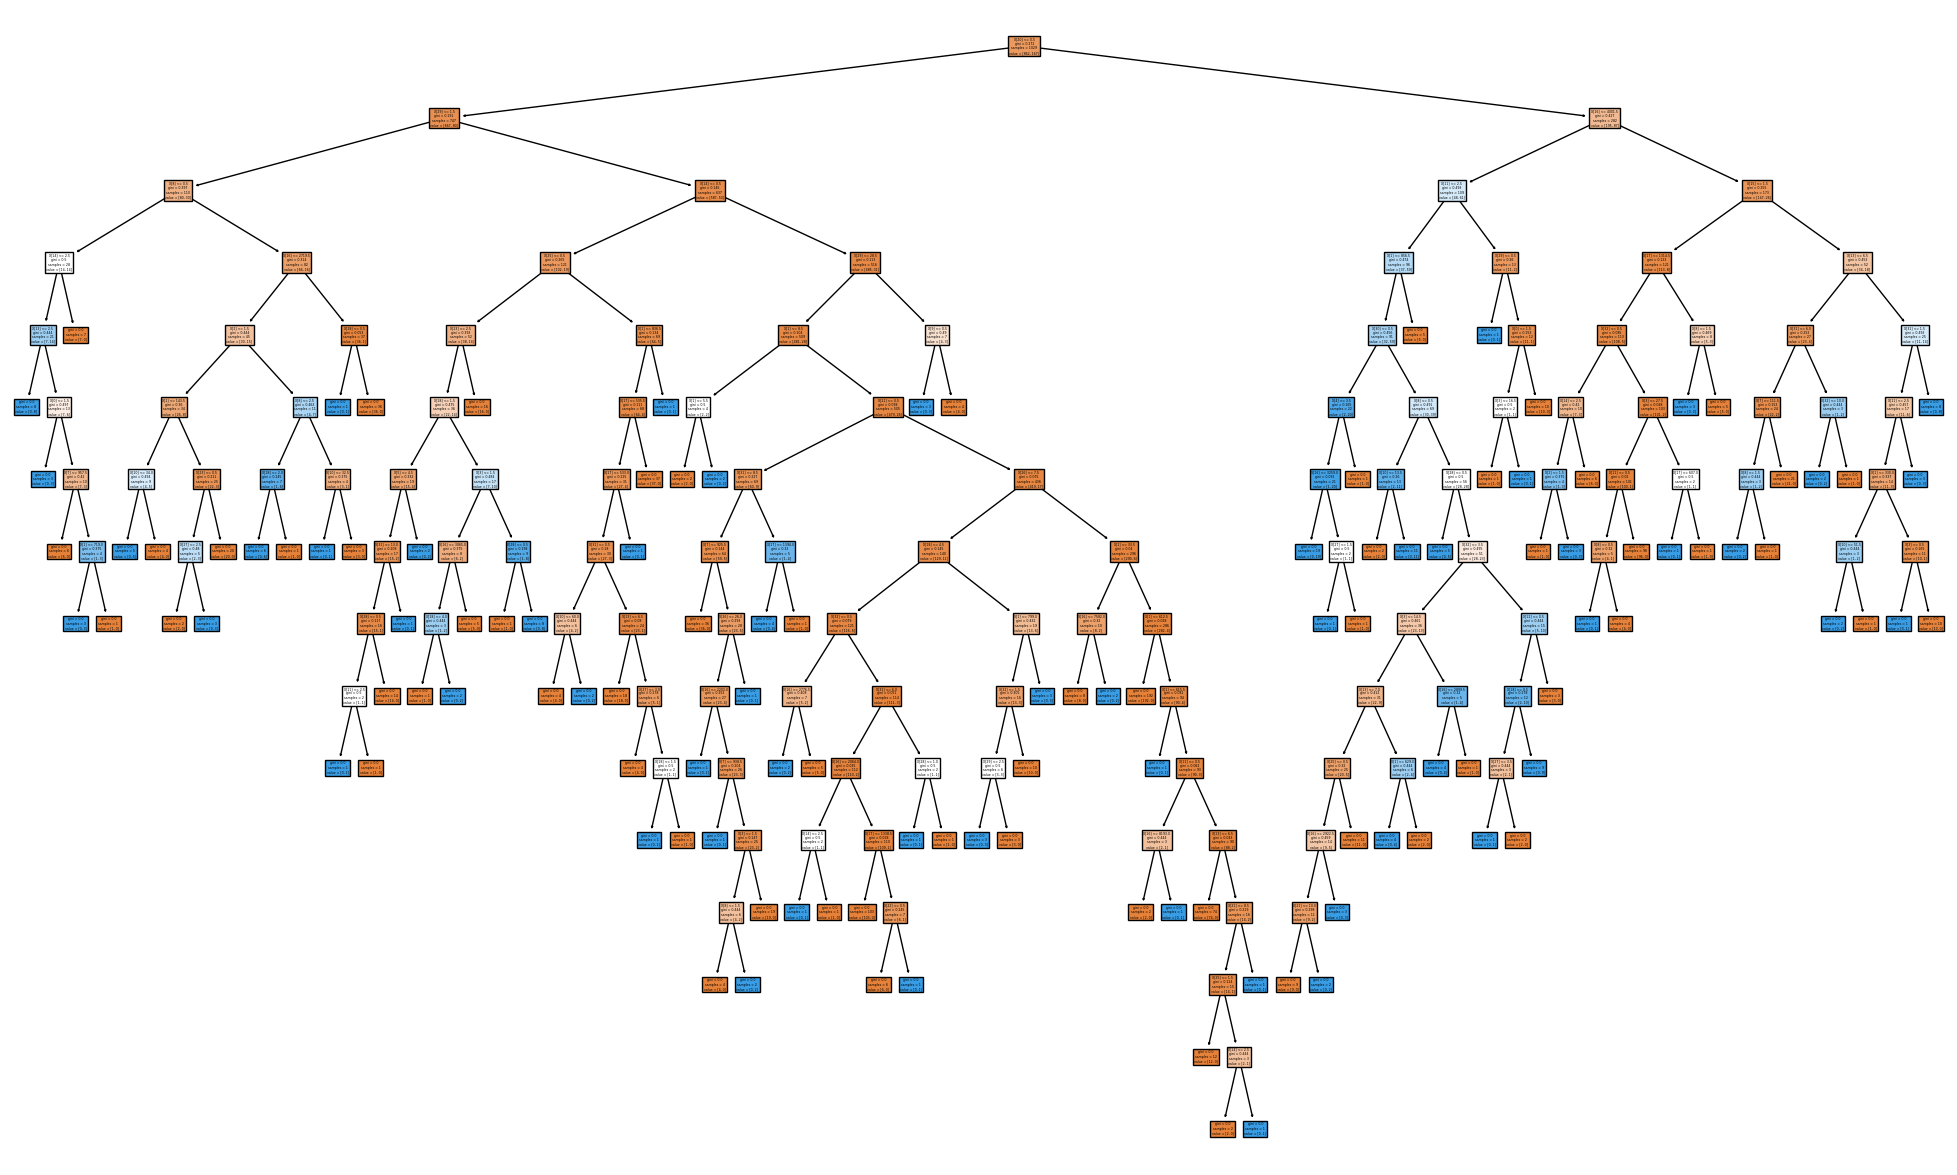

In [57]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=True)

In [59]:
from sklearn.model_selection import GridSearchCV
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [60]:
grid_search=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5,scoring="accuracy")

In [61]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [62]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'splitter': 'best'}

In [63]:
dtc_cv=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 2,
 max_features= 'auto',
 splitter= 'best')
dtc_cv.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features='auto')

In [64]:
pred=dtc_cv.predict(x_test)

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       371
           1       0.20      0.03      0.05        70

    accuracy                           0.83       441
   macro avg       0.52      0.50      0.48       441
weighted avg       0.74      0.83      0.77       441



# Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [67]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [68]:
rfc_cv= GridSearchCV(rfc,param_grid=forest_params,cv=10,scoring="accuracy")

In [69]:
rfc_cv.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packages/j

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [70]:
pred=rfc_cv.predict(x_test)

In [71]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.73      0.16      0.26        70

    accuracy                           0.86       441
   macro avg       0.80      0.57      0.59       441
weighted avg       0.84      0.86      0.82       441



# Logistics Regression

In [72]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [73]:
model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
accuracy_score(y_test,pred)

0.8390022675736961

In [76]:
confusion_matrix(y_test,pred)

array([[370,   1],
       [ 70,   0]])

In [77]:
pd.crosstab(y_test,pred)

col_0,0,1
row_0,,
0,370,1
1,70,0


In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441

